Tratamento de dados

In [2]:
import pandas as pd
import os
import numpy as np

cenarios = os.listdir()
cenarios.remove('Cenarios.ipynb')
cenarios.remove('tests.py')

rotas_txt = os.listdir('Cenario_1')

cen_1, cen_2, cen_3, cen_4, cen_5 = [],[],[],[],[]
lista_cenarios = [cen_1,cen_2,cen_3,cen_4,cen_5]


for i, cenario in enumerate(cenarios):
    for rota in rotas_txt:
        caminho = cenario+'/'+rota
        df_rota = pd.read_csv(caminho, sep=';', names=['index','rssi_up','rssi_down'])
        df_rota = df_rota.drop('index', axis=1, errors='ignore')
        df_rota = df_rota.drop('rssi_down',axis=1,errors='ignore')
        df_rota = df_rota.dropna()
        df_rota = df_rota.reset_index(drop=True)
        lista_cenarios[i].append(df_rota)

rotas = [rota.replace('.txt', '') for rota in rotas_txt]

Cálculos estatísticos

In [3]:
import math

def calcular_p_dbm(p_watt):
    p_dbm = 10*(math.log10(p_watt/(10**-3)))
    return p_dbm

def calcular_p_watt(p_dbm):
    p_watt = (10**-3)*10**(p_dbm/10)
    return p_watt

In [4]:
media_cen_1, media_cen_2, media_cen_3, media_cen_4,media_cen_5 = [],[],[],[],[]
lista_media_cenarios = [media_cen_1, media_cen_2, media_cen_3, media_cen_4,media_cen_5]

dp_cen_1, dp_cen_2,dp_cen_3,dp_cen_4,dp_cen_5, = [],[],[],[],[]
lista_dp_cenarios = [dp_cen_1, dp_cen_2,dp_cen_3,dp_cen_4,dp_cen_5]

for i in range(len(lista_cenarios)):
    for j in range(len(lista_cenarios[i])):
        lista_rssi_watt = []
        for k in range(len(lista_cenarios[i][j])):
            rssi_dbm = lista_cenarios[i][j]['rssi_up'][k]
            rssi_watt = calcular_p_watt(rssi_dbm)
            lista_rssi_watt.append(rssi_watt)
        dp = lista_cenarios[i][j]['rssi_up'].std()
        
        media_rssi_watt = np.mean(lista_rssi_watt)

        media_rssi_dbm = round(calcular_p_dbm(media_rssi_watt),2)


        lista_media_cenarios[i].append(media_rssi_dbm)
        lista_dp_cenarios[i].append(dp)


df_media = pd.DataFrame(lista_media_cenarios)
df_media = df_media.transpose()
df_media.columns = cenarios
df_media.index = rotas

df_dp = pd.DataFrame(lista_dp_cenarios)
df_dp = df_dp.transpose()
df_dp.columns = cenarios
df_dp.index = rotas
            

In [5]:
delta_cen_1, delta_cen_2,delta_cen_3,delta_cen_4,delta_cen_5 = [],[],[],[],[]
lista_deltas_cenarios = [delta_cen_1, delta_cen_2,delta_cen_3,delta_cen_4,delta_cen_5]

for i in range(len(lista_cenarios)):
    for j in range(len(lista_cenarios[i])):
        lista_deltas = []
        df_rota = lista_cenarios[i][j]
        for k in range(len(df_rota)):
            delta = abs(df_rota['rssi_up'][k]) - abs(lista_media_cenarios[i][j])
            delta = abs(delta)
            lista_deltas.append(delta)
        lista_deltas_cenarios[i].append(lista_deltas)

In [6]:
def totalizar_lista(lista):
    totalizacao = []
    for i in range(len(lista)):
        totalizacao.append(sum(lista[:(i+1)])) 
    return totalizacao


In [7]:
totalizacao_cen_1, totalizacao_cen_2,totalizacao_cen_3,totalizacao_cen_4,totalizacao_cen_5 = [],[],[],[],[]
lista_totalizacao_cenarios = [totalizacao_cen_1, totalizacao_cen_2,totalizacao_cen_3,totalizacao_cen_4,totalizacao_cen_5]

for i in range(len(lista_deltas_cenarios)):
    for j in range(len(lista_deltas_cenarios[i])):
        totalizacao = totalizar_lista(lista_deltas_cenarios[i][j])
        lista_totalizacao_cenarios[i].append(totalizacao)
        

Análise Exploratória

In [8]:
import matplotlib.pyplot as plt

def grafico_totalizacao(lista):
    eixo_x = []
    for i in range(len(lista)):
        eixo_x.append(i)
    eixo_y = lista

    plt.plot(eixo_x, eixo_y, marker='o', linestyle='-')

    plt.xlabel('Tempo')
    plt.ylabel('Total')

    plt.title('Totalização')

    plt.show()



In [9]:
def sobrepor_totalizacoes(listas):
    eixos_x = []
    for i in range(len(listas)):
        lista = []
        n = len(listas[i])
        for i in range(n):
            lista.append(i)
        eixos_x.append(lista)

    eixos_y = listas

    for i in range(len(eixos_y)):
        plt.plot(eixos_x[i], eixos_y[i],marker='x', label=f'Série {i+1}', linestyle='-')
            
    plt.xlabel('Tempo')
    plt.ylabel('Total')

    plt.title('Totalizações Sobrepostas')

    plt.legend()

"""def sobrepor_totalizacoes(lista1,lista2):
    eixo_x1 = []
    for i in range(len(lista1)):
        eixo_x1.append(i)
    eixo_y1 = lista1

    eixo_x2 = []
    for i in range(len(lista2)):
        eixo_x2.append(i)
    eixo_y2 = lista2

    plt.plot(eixo_x1, eixo_y1, label='Série 1', marker='o', linestyle='-')

    plt.plot(eixo_x2, eixo_y2, label='Série 2', marker='x', linestyle='--')

    plt.xlabel('Tempo')
    plt.ylabel('Total')

    plt.title('Totalização')

    plt.legend()

    plt.show()"""
    

"def sobrepor_totalizacoes(lista1,lista2):\n    eixo_x1 = []\n    for i in range(len(lista1)):\n        eixo_x1.append(i)\n    eixo_y1 = lista1\n\n    eixo_x2 = []\n    for i in range(len(lista2)):\n        eixo_x2.append(i)\n    eixo_y2 = lista2\n\n    plt.plot(eixo_x1, eixo_y1, label='Série 1', marker='o', linestyle='-')\n\n    plt.plot(eixo_x2, eixo_y2, label='Série 2', marker='x', linestyle='--')\n\n    plt.xlabel('Tempo')\n    plt.ylabel('Total')\n\n    plt.title('Totalização')\n\n    plt.legend()\n\n    plt.show()"

In [10]:
df_lista_cenarios = pd.DataFrame(lista_cenarios)
df_lista_cenarios = df_lista_cenarios.transpose()
df_lista_cenarios.columns = cenarios
df_lista_cenarios.index = rotas

df_media = pd.DataFrame(lista_media_cenarios)
df_media = df_media.transpose()
df_media.columns = cenarios
df_media.index = rotas

df_dp = pd.DataFrame(lista_dp_cenarios)
df_dp = df_dp.transpose()
df_dp.columns = cenarios
df_dp.index = rotas

df_totalizacao = pd.DataFrame(lista_totalizacao_cenarios)
df_totalizacao = df_totalizacao.transpose()
df_totalizacao.columns = cenarios
df_totalizacao.index = rotas

In [11]:
df_media.sum()

Cenario_1   -448.13
Cenario_2   -463.35
Cenario_3   -456.20
Cenario_4   -462.20
Cenario_5   -463.28
dtype: float64

In [12]:
df_dp.sum()

Cenario_1     7.453532
Cenario_2     7.705263
Cenario_3    24.814771
Cenario_4    26.527129
Cenario_5    28.644889
dtype: float64

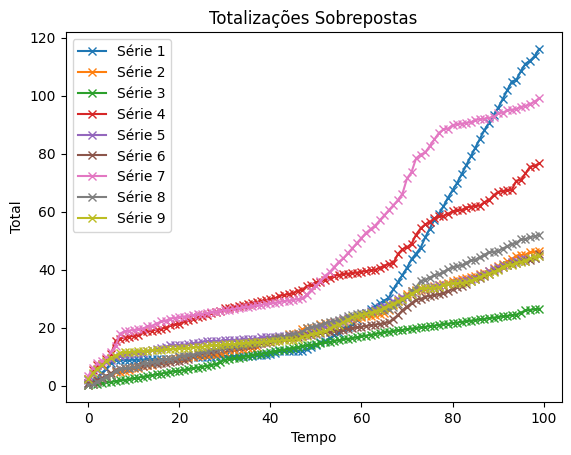

In [13]:
rotas_para_totalizar = [df_totalizacao['Cenario_1']['Rota1_B1'],df_totalizacao['Cenario_1']['Rota1_12'],df_totalizacao['Cenario_1']['Rota1_23'],df_totalizacao['Cenario_1']['Rota2_B3'],df_totalizacao['Cenario_1']['Rota2_31'],df_totalizacao['Cenario_1']['Rota2_12'],df_totalizacao['Cenario_1']['Rota3_B2'],df_totalizacao['Cenario_1']['Rota3_21'],df_totalizacao['Cenario_1']['Rota3_13']]
sobrepor_totalizacoes(rotas_para_totalizar)

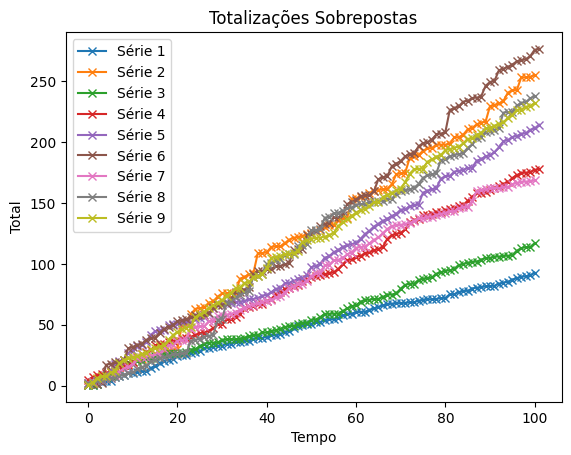

In [14]:
rotas_para_totalizar = [df_totalizacao['Cenario_3']['Rota1_B1'],df_totalizacao['Cenario_3']['Rota1_12'],df_totalizacao['Cenario_3']['Rota1_23'],df_totalizacao['Cenario_3']['Rota2_B3'],df_totalizacao['Cenario_3']['Rota2_31'],df_totalizacao['Cenario_3']['Rota2_12'],df_totalizacao['Cenario_3']['Rota3_B2'],df_totalizacao['Cenario_3']['Rota3_21'],df_totalizacao['Cenario_3']['Rota3_13']]
sobrepor_totalizacoes(rotas_para_totalizar)

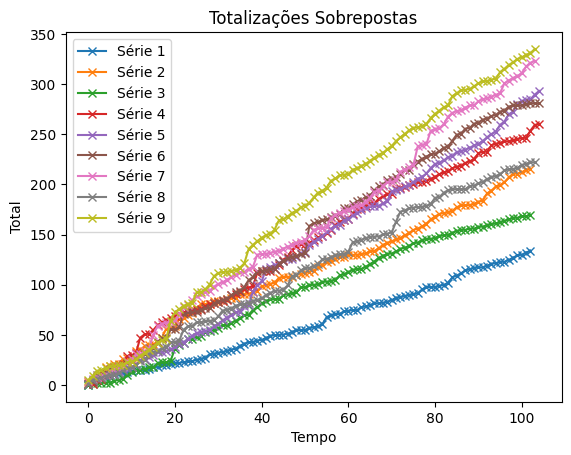

In [15]:
rotas_para_totalizar = [df_totalizacao['Cenario_5']['Rota1_B1'],df_totalizacao['Cenario_5']['Rota1_12'],df_totalizacao['Cenario_5']['Rota1_23'],df_totalizacao['Cenario_5']['Rota2_B3'],df_totalizacao['Cenario_5']['Rota2_31'],df_totalizacao['Cenario_5']['Rota2_12'],df_totalizacao['Cenario_5']['Rota3_B2'],df_totalizacao['Cenario_5']['Rota3_21'],df_totalizacao['Cenario_5']['Rota3_13']]
sobrepor_totalizacoes(rotas_para_totalizar)